In [334]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [335]:
df = pd.read_csv('sgcarmart_used_cars.csv')

# Data Cleaning

In [336]:
print(df.shape)
df.head()

(13879, 20)


,car_id,make,model,vehicle_type,posted,owner_type,owner_count,price,dep,reg_date,man_f,mil,road_tax,coe,omv,arf,seller_name,contact_number,image_url,date_crawled
0,860397,austin,mini,Others,18-Feb-2020,Dealer,More than 6,"$33,888",N.A.,01-Apr-1978,1978,N.A.,N.A.,"$19,331",N.A.,NaN,-,NaN,https://i.i-sgcm.com/cars_used/201910/860397_1...,2020/02/18
1,807015,fiat,abarth 850 tc nurburgring corsa,Others,18-Feb-2020,Direct Owner Sale,1,"$150,000",N.A.,20-May-2011,1961,N.A.,$280 /yr,"$4,230","$42,369","$42,369",Billy Tan,96949977\t\t\t\t\t\t\t\t\t,https://i.i-sgcm.com/cars_used/201903/807015_1...,2020/02/18
2,807012,austin,healey 3000,Others,18-Feb-2020,Direct Owner Sale,1,"$250,000",N.A.,02-Jan-2009,1965,N.A.,$280 /yr,"$3,134","$20,515","$20,515",Billy Tan,96949977\t\t\t\t\t\t\t\t\t,https://i.i-sgcm.com/cars_used/201903/807012_1...,2020/02/18
3,855286,volkswagen,kombi,Others,17-Feb-2020,Direct Owner Sale,1,"$65,000",N.A.,02-Jul-2018,1978,N.A.,$280 /yr,"$3,717","$11,992","$11,992",Ong,96643353\t\t\t\t\t\t\t\t\t,https://i.i-sgcm.com/cars_used/201909/855286_1...,2020/02/18
4,782693,volkswagen,beetle 1200,Others,16-Feb-2020,Dealer,1,"$32,800",N.A.,07-Aug-2018,1965,"56,879 km",$280 /yr,"$3,420","$4,898","$4,898",-,NaN,https://i.i-sgcm.com/cars_used/201811/782693_1...,2020/02/18


New line indicators (\n) needs to removed. I will use pandas remove() function with regex parameter set True. Similarly TL representing Turkish currency in price cell should be removed to be able make numerical analysis.

In [337]:
df = df.replace('$','',regex=True) #remove \n in cells

In [338]:
df = df.replace(',','',regex=True) #remove \n in cells

In [339]:
df = df.replace('/yr','',regex=True) #remove \n in cells

In [340]:
df.price = df.price.replace('price', np.nan,regex=True) #remove \n in cells

In [341]:
df = df.replace('More than', '',regex=True) #remove \n in cells

In [342]:
df = df.replace('N.A.',np.nan,regex=True) #remove \n in cells

In [343]:
df = df.replace('nan',np.nan,regex=True) #remove \n in cells

In [344]:
df.price = df.price.replace('$','',regex=True) #remove \n in cells

In [345]:
df = df[df['price'].notnull()]

In [346]:
df = df.replace('-',' ',regex=True) #remove \n in cells

In [347]:
df = df.replace('\t','',regex=True) #remove \n in cells

In [348]:
# df = df.iloc[1:]

In [349]:
df.mil = df.mil.replace('km', '', regex=True)  

In [350]:
df.mil = df.mil.replace('\(.*\)', '', regex=True)  

In [351]:
df = df[df['dep'].notnull()]

In [352]:
df = df[df['mil'].notnull()]

In [353]:
df = df[df['omv'].notnull()]

In [354]:
df = df[df['coe'].notnull()]

In [355]:
df = df[df['arf'].notnull()]

In [356]:
df = df[df['man_f'].notnull()]

In [357]:
df = df[df['posted'].notnull()]

In [358]:
df.posted.isna().sum()

0

In [359]:
df["price"] = df["price"].apply(lambda x : str(x).replace('$', '')) 

In [360]:
df["road_tax"] = df["road_tax"].apply(lambda x : str(x).replace('$', '')) 

In [361]:
df["dep"] = df["dep"].apply(lambda x : str(x).replace('$', '')) 

In [362]:
df["coe"] = df["coe"].apply(lambda x : str(x).replace('$', '')) 

In [363]:
df["omv"] = df["omv"].apply(lambda x : str(x).replace('$', '')) 

In [364]:
df["arf"] = df["arf"].apply(lambda x : str(x).replace('$', '')) 

In [365]:
df = df[df['mil'].notnull()]

In [366]:
df.price = df.price.replace(r'\D\W', '')

In [367]:
df.price = df.price.astype('float64')

In [368]:
df.reg_date = pd.to_datetime(df.reg_date)

In [369]:
df.posted = pd.to_datetime(df.posted)

In [370]:
# df = df[['car_id', 'make', 'model', 'vehicle_type', 'posted', 'owner_type',
#        'owner_count', 'price', 'dep', 'reg_date', 'man_f', 'mil', 'road_tax',
#        'coe', 'omv', 'arf']]

df = df[['car_id', 'model', 'make', 'vehicle_type', 'owner_count','owner_type', 
         'posted','reg_date', 'man_f','mil', 'dep', 'road_tax',
       'coe', 'omv', 'arf', 'price']]

In [371]:
df.head()

,car_id,model,make,vehicle_type,owner_count,owner_type,posted,reg_date,man_f,mil,dep,road_tax,coe,omv,arf,price
29,875725,healey 3000 mk ii,austin,Others,1,Dealer,2019-12-21,2019-08-05,1964,700,30640,280,3994,40374,48524,289999.0
36,868033,shuttle hybrid 1.5a,honda,Stationwagon,1,Dealer,2020-02-18,2018-10-04,2018,19000,8590,nan,31001,20941,11318,79800.0
37,881918,astra sports tourer 1.0a,opel,Stationwagon,1,Dealer,2020-02-18,2017-12-07,2017,64000,6900,392,46791,20616,5863,56800.0
38,871553,c class c200 cgi estate avantgarde,mercedes benz,Stationwagon,1,Dealer,2020-02-18,2015-06-23,2014,113000,14960,1202,68668,38344,35682,97800.0
39,887152,shuttle 1.5a g,honda,Stationwagon,1,Dealer,2020-02-18,2017-06-05,2016,82000,8060,682,52000,19387,9387,63500.0


In [372]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8916 entries, 29 to 13877
Data columns (total 16 columns):
car_id          8916 non-null object
model           8915 non-null object
make            8915 non-null object
vehicle_type    8916 non-null object
owner_count     8916 non-null object
owner_type      8916 non-null object
posted          8916 non-null datetime64[ns]
reg_date        8916 non-null datetime64[ns]
man_f           8916 non-null object
mil             8916 non-null object
dep             8916 non-null object
road_tax        8916 non-null object
coe             8916 non-null object
omv             8916 non-null object
arf             8916 non-null object
price           8916 non-null float64
dtypes: datetime64[ns](2), float64(1), object(13)
memory usage: 731.4+ KB


In [373]:
df.man_f = df.man_f.astype(np.int32)

In [374]:
df.owner_count = df.owner_count.astype(np.int32)
df.mil = df.mil.astype(np.float64)
df.dep = df.dep.astype(np.float64)
df.raod_tax = df.road_tax.astype(np.float64)
df.coe = df.coe.astype(np.float64)
df.omv = df.omv.astype(np.float64)
df.arf = df.arf.astype(np.float64)

C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [375]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8916 entries, 29 to 13877
Data columns (total 16 columns):
car_id          8916 non-null object
model           8915 non-null object
make            8915 non-null object
vehicle_type    8916 non-null object
owner_count     8916 non-null int32
owner_type      8916 non-null object
posted          8916 non-null datetime64[ns]
reg_date        8916 non-null datetime64[ns]
man_f           8916 non-null int32
mil             8916 non-null float64
dep             8916 non-null float64
road_tax        8916 non-null object
coe             8916 non-null float64
omv             8916 non-null float64
arf             8916 non-null float64
price           8916 non-null float64
dtypes: datetime64[ns](2), float64(6), int32(2), object(6)
memory usage: 905.5+ KB


In [376]:
df.to_excel('cleaned_dataset_final_v3.xlsx')

In [377]:
df.head()

,car_id,model,make,vehicle_type,owner_count,owner_type,posted,reg_date,man_f,mil,dep,road_tax,coe,omv,arf,price
29,875725,healey 3000 mk ii,austin,Others,1,Dealer,2019-12-21,2019-08-05,1964,700.0,30640.0,280,3994.0,40374.0,48524.0,289999.0
36,868033,shuttle hybrid 1.5a,honda,Stationwagon,1,Dealer,2020-02-18,2018-10-04,2018,19000.0,8590.0,nan,31001.0,20941.0,11318.0,79800.0
37,881918,astra sports tourer 1.0a,opel,Stationwagon,1,Dealer,2020-02-18,2017-12-07,2017,64000.0,6900.0,392,46791.0,20616.0,5863.0,56800.0
38,871553,c class c200 cgi estate avantgarde,mercedes benz,Stationwagon,1,Dealer,2020-02-18,2015-06-23,2014,113000.0,14960.0,1202,68668.0,38344.0,35682.0,97800.0
39,887152,shuttle 1.5a g,honda,Stationwagon,1,Dealer,2020-02-18,2017-06-05,2016,82000.0,8060.0,682,52000.0,19387.0,9387.0,63500.0


In [378]:
df.dtypes

car_id                  object
model                   object
make                    object
vehicle_type            object
owner_count              int32
owner_type              object
posted          datetime64[ns]
reg_date        datetime64[ns]
man_f                    int32
mil                    float64
dep                    float64
road_tax                object
coe                    float64
omv                    float64
arf                    float64
price                  float64
dtype: object

In [380]:
df['make'].nunique()

61

### Missing values

In [382]:
df.isna().any()

car_id          False
model            True
make             True
vehicle_type    False
owner_count     False
owner_type      False
posted          False
reg_date        False
man_f           False
mil             False
dep             False
road_tax        False
coe             False
omv             False
arf             False
price           False
dtype: bool

There is no missing value in the dataframe.

Successful! There are 81 cities in Turkey.

In [384]:
df.to_csv(r'C:\Users\d33ps3curity\upwork\dataset\Predicting_used_car_prices\sgcarmart_used_cars_cleaned.csv', index=None, header=True)

# Exploratory Data Analysis

### Price

In [385]:
df.price.mean()

113034.57671601615

In [386]:
df.price.median()

79788.5

There is a big difference between mean and median which indicates outliers. So first need to check if there is ubnormal values.

In [387]:
print(df.price.max())
print(df.price.min())

1388800.0
8000.0


In [388]:
df.price.sort_values(ascending=False)

416      1388800.0
3220     1388800.0
8823     1290000.0
1229     1280000.0
9724     1280000.0
           ...    
4370        8800.0
13403       8800.0
1512        8800.0
12641       8500.0
10537       8000.0
Name: price, Length: 8916, dtype: float64

In [392]:
prices_list = list(df.price.sort_values(ascending=False))

Highest value and the lowest four values seem ubnormal so I will remove these.

In [393]:
df['price'][416]

1388800.0

In [395]:
prices_list[:20]

[1388800.0,
 1388800.0,
 1290000.0,
 1280000.0,
 1280000.0,
 1230000.0,
 1230000.0,
 1230000.0,
 1230000.0,
 1220000.0,
 1220000.0,
 1210000.0,
 1210000.0,
 1200000.0,
 1180000.0,
 1127800.0,
 1127800.0,
 1068800.0,
 1068800.0,
 1050000.0]

In [396]:
df.price.max()

1388800.0

In [398]:
print(df.price.mean())
print(df.price.median())

113034.57671601615
79788.5


In [399]:
df.price.mode()

0    63800.0
dtype: float64

In [400]:
sns.set(style='darkgrid')

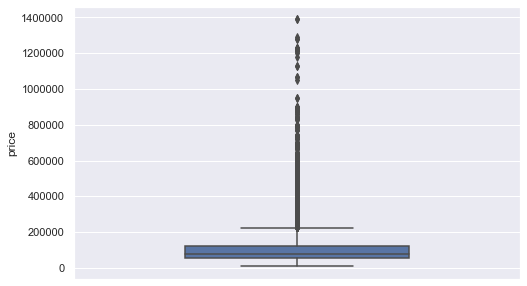

In [401]:
plt.figure(figsize=(8,5))
sns.boxplot(y='price', data=df, width=0.5)

Text(0.5, 1.0, 'Frequency Distribution Plot of Prices')

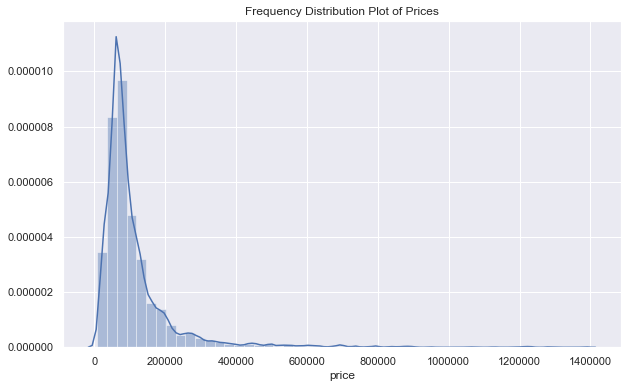

In [402]:
x = df.price
plt.figure(figsize=(10,6))
sns.distplot(x).set_title('Frequency Distribution Plot of Prices')

The graphs above show the frequency distribution of prices. It is slightly right skewed which means there are some outliers with very high prices.

## Date

I don't think date by itself has an effect on the price but waiting periof of the ad on website might have some effect. Longer waiting time might motivate owner to reduce the price. So I will add a columnt indicating the number of days ad has been on the website. Data was scraped on 18.01.2020.

In [403]:
df['ad_duration'] = pd.to_datetime('2020-06-20') - df['posted']

In [404]:
df.head()

,car_id,model,make,vehicle_type,owner_count,owner_type,posted,reg_date,man_f,mil,dep,road_tax,coe,omv,arf,price,ad_duration
29,875725,healey 3000 mk ii,austin,Others,1,Dealer,2019-12-21,2019-08-05,1964,700.0,30640.0,280,3994.0,40374.0,48524.0,289999.0,182 days
36,868033,shuttle hybrid 1.5a,honda,Stationwagon,1,Dealer,2020-02-18,2018-10-04,2018,19000.0,8590.0,nan,31001.0,20941.0,11318.0,79800.0,123 days
37,881918,astra sports tourer 1.0a,opel,Stationwagon,1,Dealer,2020-02-18,2017-12-07,2017,64000.0,6900.0,392,46791.0,20616.0,5863.0,56800.0,123 days
38,871553,c class c200 cgi estate avantgarde,mercedes benz,Stationwagon,1,Dealer,2020-02-18,2015-06-23,2014,113000.0,14960.0,1202,68668.0,38344.0,35682.0,97800.0,123 days
39,887152,shuttle 1.5a g,honda,Stationwagon,1,Dealer,2020-02-18,2017-06-05,2016,82000.0,8060.0,682,52000.0,19387.0,9387.0,63500.0,123 days


In [405]:
df['ad_duration'].isna().any()

False

In [406]:
df.ad_duration = df.ad_duration.astype('str')

In [407]:
df.ad_duration.dtype

dtype('O')

In [408]:
df.ad_duration = df.ad_duration.replace('days','',regex=True)

In [409]:
df.head()

,car_id,model,make,vehicle_type,owner_count,owner_type,posted,reg_date,man_f,mil,dep,road_tax,coe,omv,arf,price,ad_duration
29,875725,healey 3000 mk ii,austin,Others,1,Dealer,2019-12-21,2019-08-05,1964,700.0,30640.0,280,3994.0,40374.0,48524.0,289999.0,182 00:00:00.000000000
36,868033,shuttle hybrid 1.5a,honda,Stationwagon,1,Dealer,2020-02-18,2018-10-04,2018,19000.0,8590.0,nan,31001.0,20941.0,11318.0,79800.0,123 00:00:00.000000000
37,881918,astra sports tourer 1.0a,opel,Stationwagon,1,Dealer,2020-02-18,2017-12-07,2017,64000.0,6900.0,392,46791.0,20616.0,5863.0,56800.0,123 00:00:00.000000000
38,871553,c class c200 cgi estate avantgarde,mercedes benz,Stationwagon,1,Dealer,2020-02-18,2015-06-23,2014,113000.0,14960.0,1202,68668.0,38344.0,35682.0,97800.0,123 00:00:00.000000000
39,887152,shuttle 1.5a g,honda,Stationwagon,1,Dealer,2020-02-18,2017-06-05,2016,82000.0,8060.0,682,52000.0,19387.0,9387.0,63500.0,123 00:00:00.000000000


In [415]:
df.ad_duration = df.ad_duration.str.split(' ', expand=True)

In [416]:
df.head()

,car_id,model,make,vehicle_type,owner_count,owner_type,posted,reg_date,man_f,mil,dep,road_tax,coe,omv,arf,price,ad_duration
29,875725,healey 3000 mk ii,austin,Others,1,Dealer,2019-12-21,2019-08-05,1964,700.0,30640.0,280,3994.0,40374.0,48524.0,289999.0,182
36,868033,shuttle hybrid 1.5a,honda,Stationwagon,1,Dealer,2020-02-18,2018-10-04,2018,19000.0,8590.0,nan,31001.0,20941.0,11318.0,79800.0,123
37,881918,astra sports tourer 1.0a,opel,Stationwagon,1,Dealer,2020-02-18,2017-12-07,2017,64000.0,6900.0,392,46791.0,20616.0,5863.0,56800.0,123
38,871553,c class c200 cgi estate avantgarde,mercedes benz,Stationwagon,1,Dealer,2020-02-18,2015-06-23,2014,113000.0,14960.0,1202,68668.0,38344.0,35682.0,97800.0,123
39,887152,shuttle 1.5a g,honda,Stationwagon,1,Dealer,2020-02-18,2017-06-05,2016,82000.0,8060.0,682,52000.0,19387.0,9387.0,63500.0,123


In [417]:
df.ad_duration = df.ad_duration.astype('int64')

In [418]:
print(df.ad_duration.mean())
print(df.ad_duration.median())

133.14468371467026
131.0


Text(0.5, 1.0, 'Frequency Distribution Plot of Ad Duration')

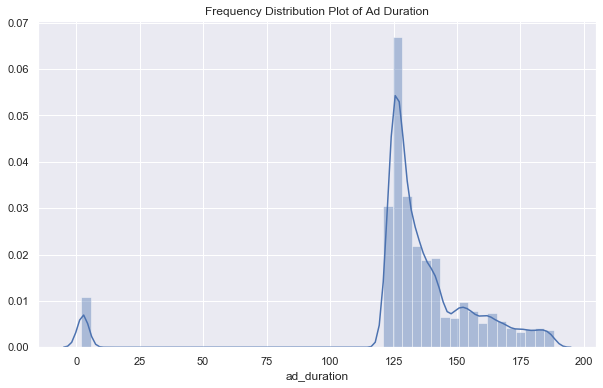

In [419]:
d = df.ad_duration
plt.figure(figsize=(10,6))
sns.distplot(d).set_title('Frequency Distribution Plot of Ad Duration')

In [420]:
e = d[d<50]

Text(0.5, 1.0, 'Frequency Distribution Plot of Ad Duration (<50)')

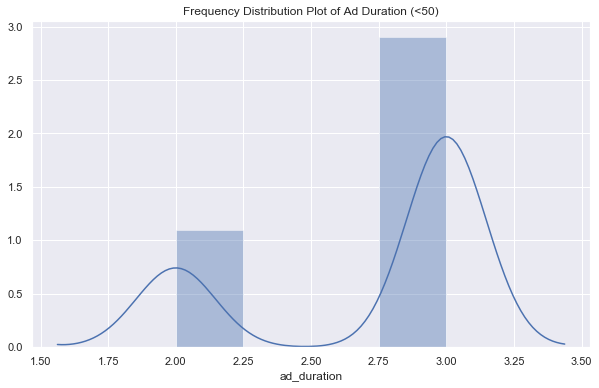

In [421]:
plt.figure(figsize=(10,6))
sns.distplot(e).set_title('Frequency Distribution Plot of Ad Duration (<50)')

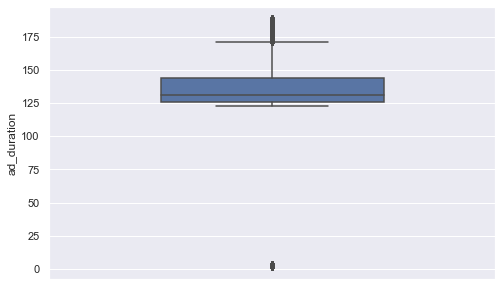

In [422]:
plt.figure(figsize=(8,5))
sns.boxplot(y='ad_duration', data=df, width=0.5)

## Year

In [424]:
df.man_f.value_counts()[:10]

2016    1462
2015    1118
2018    1043
2017    1026
2014     592
2009     587
2008     569
2019     527
2011     448
2012     381
Name: man_f, dtype: int64

The age of the car definitely effects the prices. However, instead of the model year of the car, it makes more sense to use is as age. So I will substiture 'year' column from current year.

In [425]:
df['age'] = 2020 - df['man_f']

In [426]:
df.head()

,car_id,model,make,vehicle_type,owner_count,owner_type,posted,reg_date,man_f,mil,dep,road_tax,coe,omv,arf,price,ad_duration,age
29,875725,healey 3000 mk ii,austin,Others,1,Dealer,2019-12-21,2019-08-05,1964,700.0,30640.0,280,3994.0,40374.0,48524.0,289999.0,182,56
36,868033,shuttle hybrid 1.5a,honda,Stationwagon,1,Dealer,2020-02-18,2018-10-04,2018,19000.0,8590.0,nan,31001.0,20941.0,11318.0,79800.0,123,2
37,881918,astra sports tourer 1.0a,opel,Stationwagon,1,Dealer,2020-02-18,2017-12-07,2017,64000.0,6900.0,392,46791.0,20616.0,5863.0,56800.0,123,3
38,871553,c class c200 cgi estate avantgarde,mercedes benz,Stationwagon,1,Dealer,2020-02-18,2015-06-23,2014,113000.0,14960.0,1202,68668.0,38344.0,35682.0,97800.0,123,6
39,887152,shuttle 1.5a g,honda,Stationwagon,1,Dealer,2020-02-18,2017-06-05,2016,82000.0,8060.0,682,52000.0,19387.0,9387.0,63500.0,123,4


Text(0.5, 1.0, 'Frequency Distribution Plot of Age of the Cars')

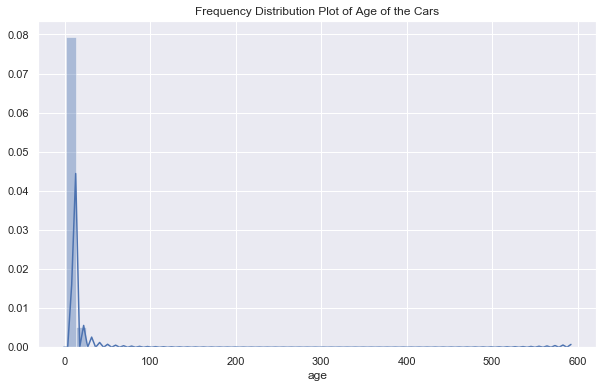

In [427]:
a = df.age
plt.figure(figsize=(10,6))
sns.distplot(a).set_title('Frequency Distribution Plot of Age of the Cars')

## km

In [428]:
print(df.mil.mean())
print(df.mil.median())

66827.4333781965
56076.0


Text(0.5, 1.0, 'Frequency Distribution Plot of Km')

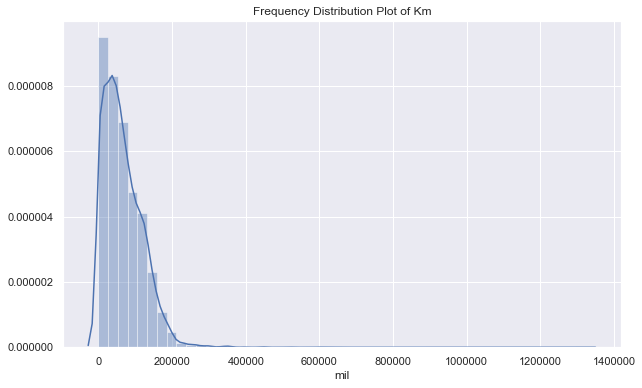

In [430]:
k = df.mil
plt.figure(figsize=(10,6))
sns.distplot(k).set_title('Frequency Distribution Plot of Km')

In [432]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\d33ps3curity\AppData\Local\Programs\Python\Python37-32\python.exe -m pip install --upgrade pip' command.


In [433]:
from wordcloud import WordCloud, STOPWORDS 

In [455]:
df.make = df.make.astype('str')

In [456]:
len(df.make)

8916

In [457]:
text_list = list(df.make)

In [458]:
text_list_new = []

In [459]:
for t in text_list:
    if not t.isalnum():
        text_list_new.append(t)
        

In [460]:
try:
    text = 'aa-'.join(text_list)
except TypeError:
    pass

In [461]:
wordcloud = WordCloud(background_color='white').generate(text)

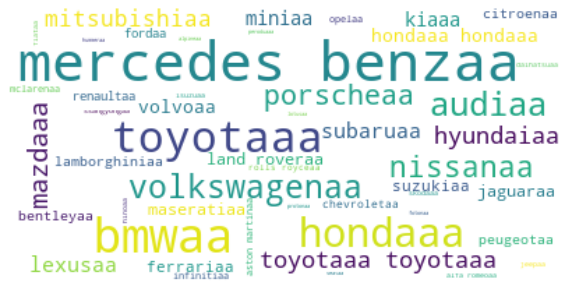

In [462]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [463]:
stopwords = ['VW', 'VOLKSWAGEN', 'POLO', 'MODEL', 'KM']

In [464]:
wordcloud = WordCloud(stopwords=stopwords).generate(text)

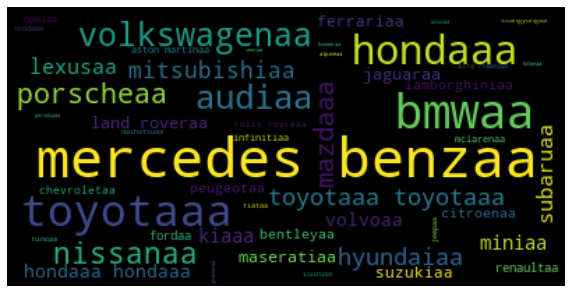

In [465]:
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## model

In [466]:
df.model.value_counts()

 vezel 1.5a x                              113
 c class c180 avantgarde                   105
 corolla altis 1.6a elegance                71
 3 1.5a sunroof                             60
 dyna 150 3.0m                              55
                                          ... 
 cls class cls500                            1
 estima 2.4a aeras moonroof                  1
 gle class gle400 coupe amg line 4matic      1
 2 series 218i coupe sport                   1
 attrage 1.2a sports                         1
Name: model, Length: 2135, dtype: int64

Model column includes three different kinds of information: engine size, fuel type and variant. After checking the values, I found out that only engine size information is complete for all cells. Fuel type and variant are missing for most of the cells so I created a separate column for engine size.

In [473]:
#remove spaces
df.model = df.model.replace(' ','',regex=True)

In [474]:
df.model = df.model.astype('str')

In [475]:
engine = [x[:3] for x in df.model]

In [476]:
engine[:5]

['hea', 'shu', 'ast', 'ccl', 'shu']

In [477]:
df['engine'] = engine

In [478]:
df.head()

,car_id,model,make,vehicle_type,owner_count,owner_type,posted,reg_date,man_f,mil,dep,road_tax,coe,omv,arf,price,ad_duration,age,engine
29,875725,healey3000mkii,austin,Others,1,Dealer,2019-12-21,2019-08-05,1964,700.0,30640.0,280,3994.0,40374.0,48524.0,289999.0,182,56,hea
36,868033,shuttlehybrid1.5a,honda,Stationwagon,1,Dealer,2020-02-18,2018-10-04,2018,19000.0,8590.0,nan,31001.0,20941.0,11318.0,79800.0,123,2,shu
37,881918,astrasportstourer1.0a,opel,Stationwagon,1,Dealer,2020-02-18,2017-12-07,2017,64000.0,6900.0,392,46791.0,20616.0,5863.0,56800.0,123,3,ast
38,871553,cclassc200cgiestateavantgarde,mercedes benz,Stationwagon,1,Dealer,2020-02-18,2015-06-23,2014,113000.0,14960.0,1202,68668.0,38344.0,35682.0,97800.0,123,6,ccl
39,887152,shuttle1.5ag,honda,Stationwagon,1,Dealer,2020-02-18,2017-06-05,2016,82000.0,8060.0,682,52000.0,19387.0,9387.0,63500.0,123,4,shu


In [479]:
df.engine.value_counts()

ecl    381
ccl    337
cor    254
vez    206
cla    187
      ... 
qx3      1
com      1
952      1
viv      1
nnr      1
Name: engine, Length: 473, dtype: int64

In [644]:
df[['engine','age','km']].groupby(['engine']).mean().sort_values(by='age', ascending=False)

,age,km
engine,,
1.3,28.250000,279464.000000
1.9,20.400000,209262.450000
1.6,16.210334,186531.867954
1.4,9.918979,136056.360340
1.2,6.110373,109629.562656
1.0,2.696822,53963.916870


# Regression Model

### Feature selection

In [481]:
df.head()

,car_id,model,make,vehicle_type,owner_count,owner_type,posted,reg_date,man_f,mil,dep,road_tax,coe,omv,arf,price,ad_duration,age,engine
29,875725,healey3000mkii,austin,Others,1,Dealer,2019-12-21,2019-08-05,1964,700.0,30640.0,280,3994.0,40374.0,48524.0,289999.0,182,56,hea
36,868033,shuttlehybrid1.5a,honda,Stationwagon,1,Dealer,2020-02-18,2018-10-04,2018,19000.0,8590.0,nan,31001.0,20941.0,11318.0,79800.0,123,2,shu
37,881918,astrasportstourer1.0a,opel,Stationwagon,1,Dealer,2020-02-18,2017-12-07,2017,64000.0,6900.0,392,46791.0,20616.0,5863.0,56800.0,123,3,ast
38,871553,cclassc200cgiestateavantgarde,mercedes benz,Stationwagon,1,Dealer,2020-02-18,2015-06-23,2014,113000.0,14960.0,1202,68668.0,38344.0,35682.0,97800.0,123,6,ccl
39,887152,shuttle1.5ag,honda,Stationwagon,1,Dealer,2020-02-18,2017-06-05,2016,82000.0,8060.0,682,52000.0,19387.0,9387.0,63500.0,123,4,shu


Text(0.5, 1.0, 'Km vs Price')

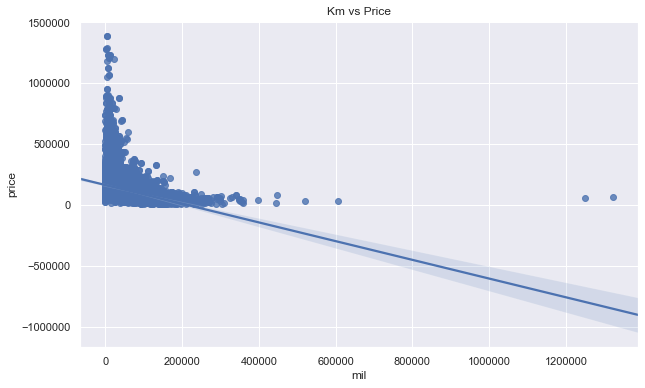

In [482]:
plt.figure(figsize=(10,6))
sns.regplot(x='mil', y='price', data=df).set_title('Km vs Price')

In [483]:
df.shape

(8916, 19)

In [485]:
df = df[df.mil < 400000]

In [486]:
df.shape

(8910, 19)

Text(0.5, 1.0, 'Km vs Price')

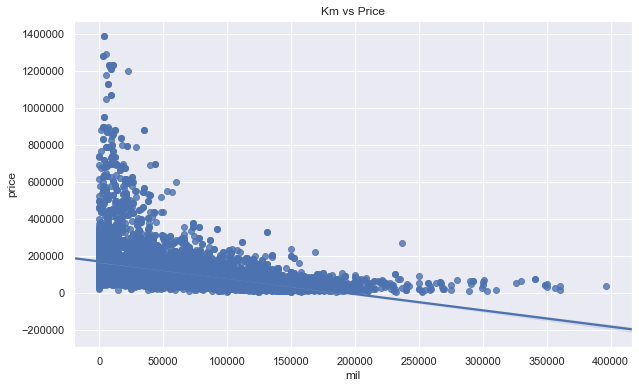

In [488]:
plt.figure(figsize=(10,6))
sns.regplot(x='mil', y='price', data=df).set_title('Km vs Price')

Text(0.5, 1.0, 'Age vs Price')

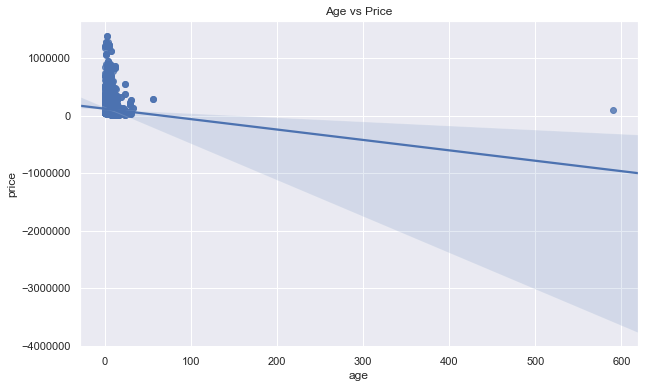

In [489]:
plt.figure(figsize=(10,6))
sns.regplot(x='age', y='price', data=df).set_title('Age vs Price')

In [490]:
df = df[df.age < 30]

Text(0.5, 1.0, 'Age vs Price')

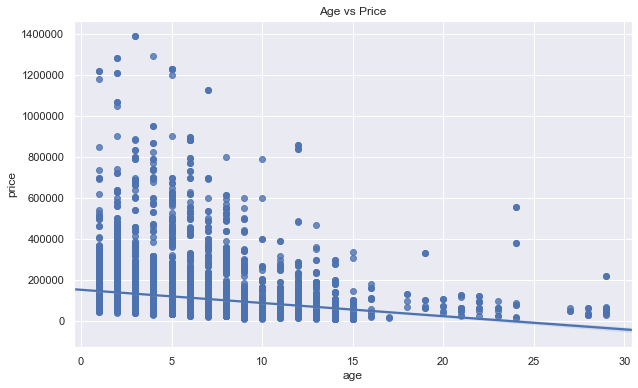

In [491]:
plt.figure(figsize=(10,6))
sns.regplot(x='age', y='price', data=df).set_title('Age vs Price')

Text(0.5, 1.0, 'Ad Duration vs Price')

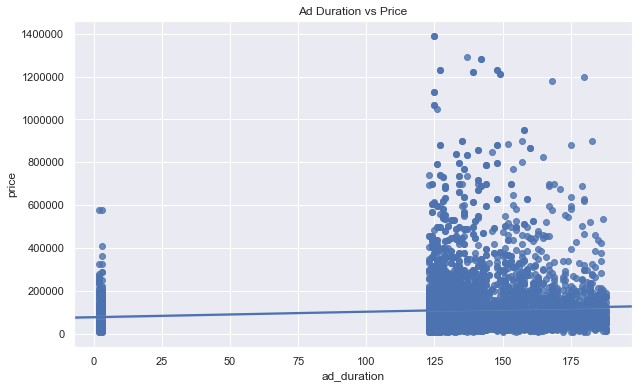

In [492]:
plt.figure(figsize=(10,6))
sns.regplot(x='ad_duration', y='price', data=df).set_title('Ad Duration vs Price')

### Correlation matrix

In [494]:
print(df.corr())

             owner_count     man_f       mil       dep       coe       omv  \
owner_count     1.000000 -0.706101  0.522094  0.087465 -0.054780  0.201313   
man_f          -0.706101  1.000000 -0.766848 -0.028899  0.058958 -0.094888   
mil             0.522094 -0.766848  1.000000 -0.151934 -0.038218 -0.149115   
dep             0.087465 -0.028899 -0.151934  1.000000  0.256812  0.706992   
coe            -0.054780  0.058958 -0.038218  0.256812  1.000000  0.299144   
omv             0.201313 -0.094888 -0.149115  0.706992  0.299144  1.000000   
arf             0.142995 -0.049363 -0.180887  0.670695  0.269808  0.954499   
price          -0.059793  0.219120 -0.385836  0.652483  0.171085  0.836860   
ad_duration     0.023780 -0.005802 -0.023661  0.055881  0.019947  0.065248   
age             0.706101 -1.000000  0.766848  0.028899 -0.058958  0.094888   

                  arf     price  ad_duration       age  
owner_count  0.142995 -0.059793     0.023780  0.706101  
man_f       -0.049363  0.21

In [495]:
corr = df.corr()

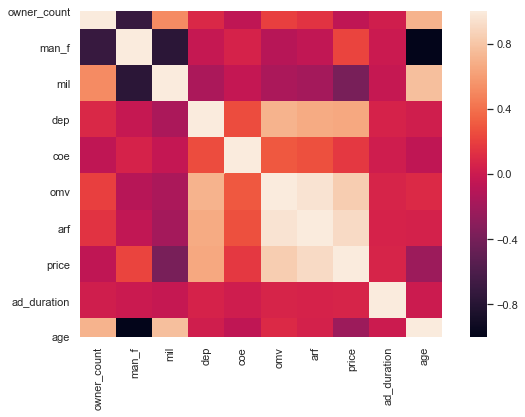

In [496]:
plt.figure(figsize=(10,6))
sns.heatmap(corr, vmax=1, square=True)

### Linear regression model

In [497]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [499]:
X = df[['age','mil','ad_duration']]
y = df['price']

In [500]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [501]:
linreg = LinearRegression()

In [502]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [503]:
scores = cross_val_score(linreg, X_train, y_train, cv=5)
print(np.mean(scores))

0.16946688424274342


In [504]:
scores_test = cross_val_score(linreg, X_test, y_test, cv=5)
print(np.mean(scores_test))

0.1492358882445319


In [505]:
linreg.score(X_train, y_train)

0.17114615669017275

In [506]:
linreg.score(X_test, y_test)

0.1480225024202474

In [507]:
plt.figure(figsize=(10,6))
sns.residplot(x=y_pred, y=y_test)

NameError: name 'y_pred' is not defined

<Figure size 720x432 with 0 Axes>

### random forest regressor

In [508]:
from sklearn.ensemble import RandomForestRegressor

In [509]:
regr = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)

In [510]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [511]:
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_train, y_train)))

R-squared score (training): 0.694


In [512]:
print('R-squared score (training): {:.3f}'
     .format(regr.score(X_test, y_test)))

R-squared score (training): 0.417


### withoud ad_duration

In [514]:
X1 = df[['age','mil','dep']]
y1 = df['price']

In [515]:
regr1 = RandomForestRegressor(max_depth=10, random_state=0, n_estimators=10)

In [516]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, random_state=42)

In [517]:
regr1.fit(X_train1, y_train1)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [518]:
print('R-squared score (training): {:.3f}'
     .format(regr1.score(X_train1, y_train1)))

R-squared score (training): 0.990


In [519]:
print('R-squared score (training): {:.3f}'
     .format(regr1.score(X_test1, y_test1)))

R-squared score (training): 0.959
